In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X=pd.read_csv("Diabetes_XTrain.csv")

In [3]:
Y=pd.read_csv("Diabetes_YTrain.csv")

In [66]:
X=np.array(X)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
Pregnancies                 576 non-null int64
Glucose                     576 non-null int64
BloodPressure               576 non-null int64
SkinThickness               576 non-null int64
Insulin                     576 non-null int64
BMI                         576 non-null float64
DiabetesPedigreeFunction    576 non-null float64
Age                         576 non-null int64
dtypes: float64(2), int64(6)
memory usage: 36.1 KB


In [67]:
X[2]

array([  7.   , 147.   ,  76.   ,   0.   ,   0.   ,  39.4  ,   0.257,
        43.   ])

In [68]:
Y=np.array(Y)

In [5]:
ones=np.ones((X.shape[0],1))

In [6]:
X=np.hstack((ones,X))

In [7]:
X.shape

(576, 9)

In [40]:
Y

,Outcome
0,1
1,0
2,1
3,1
4,0
...,...
571,0
572,1
573,0
574,0


In [26]:
def sigmoid(z):
    return 1/(1.0 + np.exp(-z))

def getYPred(theta,X):
    return sigmoid(np.dot(X,theta))

def predict(theta,X):
    Y_pred = getYPred(theta,X)
    outputs = np.zeros((Y_pred.shape))
    outputs[Y_pred>0.5]=1
    return outputs

def error(X,Y,theta):
    Y_ = getYPred(theta,X)
    # Binary Cross Entropy
    e = -(np.sum(Y*np.log(Y_) + (1-Y)*np.log(1-Y_)))
    m = X.shape[0]
    return e/m

def getGrad(X,Y,theta):
    Y_ = getYPred(theta,X)
    grad = np.dot(X.T,(Y_-Y))
    return grad

def gradDescent(X,Y,lr,maxItr):
    theta = np.zeros((X.shape[1],1))
    error_list = [ ]
    
    for i in range(maxItr): 
        grad = getGrad(X,Y,theta)
        e = error(X,Y,theta) 
        theta = theta - lr*grad
        error_list.append(e)
        
    return theta,error_list


In [27]:
theta,error_list=gradDescent(X,Y,0.01,1000)

c:\users\bhagesh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [28]:
error_list

[Outcome    4.017525
 dtype: float64, Outcome    7.495391
 dtype: float64, Outcome    4.017525
 dtype: float64, Outcome    7.495391
 dtype: float64, Outcome    4.017525
 dtype: float64, Outcome    5.856396
 dtype: float64, Outcome    4.017525
 dtype: float64, Outcome    7.495391
 dtype: float64, Outcome    4.017525
 dtype: float64, Outcome    6.116237
 dtype: float64, Outcome    4.017525
 dtype: float64, Outcome    4.077488
 dtype: float64, Outcome    7.495391
 dtype: float64, Outcome    4.017525
 dtype: float64, Outcome    7.475403
 dtype: float64, Outcome    4.017525
 dtype: float64, Outcome    4.077488
 dtype: float64, Outcome    6.276139
 dtype: float64, Outcome    4.017525
 dtype: float64, Outcome    4.037513
 dtype: float64, Outcome    7.495391
 dtype: float64, Outcome    4.017525
 dtype: float64, Outcome    7.23555
 dtype: float64, Outcome    4.017525
 dtype: float64, Outcome    3.957562
 dtype: float64, Outcome    7.41544
 dtype: float64, Outcome    4.017525
 dtype: float64, Ou

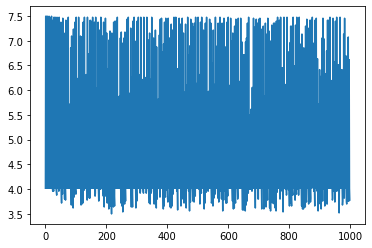

In [29]:
plt.plot(error_list)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr=LogisticRegression()

In [46]:
lr.fit(X,Y)

c:\users\bhagesh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\bhagesh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
lr.score(X,Y)

0.78125

In [39]:
lr.predict(X)

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,

In [69]:
X_test=pd.read_csv("Diabetes_Xtest.csv")

In [70]:
X_test=np.array(X_test)

In [42]:
Y_=lr.predict(X_test)

In [43]:
Y_

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [44]:
Y_=pd.DataFrame(Y_,columns=["Outcome"])

In [45]:
Y_

,Outcome
0,1
1,0
2,0
3,0
4,0
...,...
187,0
188,0
189,1
190,0


In [48]:
Y_.to_csv("pred.csv",index=False)

In [162]:
def dist(a1,a2):
    return np.sum((a1-a2)**2)**0.5

def KNN(X,Y,X_test,k=17):
    n=X_test.shape[0]
    m=X.shape[0]
    Y_=np.zeros((n,))
    for i in range(n):
        d=[]
        for j in range(m):
            dis=dist(X_test[i],X[j])
            d.append((dis,Y[j]))
        d.sort()
        d=np.array(d[:k])[:,1]
        uniq,freq=np.unique(d,return_counts=True)
        idx=np.argmax(freq)
        x=uniq[idx]
        x=int(x)
        Y_[i]=x
    return Y_

In [163]:
Y_=KNN(X,Y,X_test)

In [164]:
Y_

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.])

In [165]:
Y_=pd.DataFrame(Y_,columns=["Outcome"])

In [166]:
Y_=Y_.astype(int)

In [167]:
Y_

,Outcome
0,1
1,0
2,0
3,0
4,0
...,...
187,0
188,0
189,1
190,0


In [168]:
Y_.to_csv("pred.csv",index=False)